In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as plim


1: Separera så df bara innehåller vindar från 90 graader till 180 (öst, sydöst, syd)
<p>2: För varje år, kolla hur många dagar från det året som finns med</p>
<p>3: Dela med 365 för at få andelen per år  

In [3]:
df_save = pd.read_pickle('../Dataframes/df_wind_save.pkl')

In [4]:
df_save

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Kvalitet_1,Year,Month,Snitt_per_dag,Max_uppmätta_hastighet
0,1951-01-01,00:00:00,100.0,G,3.0,G,1951,1,3.29,5.0
1,1951-01-01,03:00:00,110.0,G,2.0,G,1951,1,3.29,5.0
2,1951-01-01,06:00:00,70.0,G,2.0,G,1951,1,3.29,5.0
3,1951-01-01,12:00:00,90.0,G,3.0,G,1951,1,3.29,5.0
4,1951-01-01,15:00:00,70.0,G,4.0,G,1951,1,3.29,5.0
...,...,...,...,...,...,...,...,...,...,...
430417,2006-12-05,09:00:00,190.0,G,8.0,G,2006,12,9.21,11.0
430418,2006-12-05,10:00:00,190.0,Y,8.0,Y,2006,12,9.21,11.0
430419,2006-12-05,11:00:00,200.0,Y,9.0,Y,2006,12,9.21,11.0
430420,2006-12-05,12:00:00,200.0,G,11.0,G,2006,12,9.21,11.0


In [5]:
dates_present_org = {}
for i in range (1951, 2007):
    dates = []
    counter = 0
    for ind, val in df_save.iterrows():
        if val['Year'] == i:
            if val['Datum'] not in dates:
                dates.append(val['Datum'])
                counter += 1
    res = {f'{i}': counter}            
    dates_present_org.update(res)

KeyboardInterrupt: 

In [ ]:
# There are no big gaps in the data
dates_present_org

{'1951': 365,
 '1952': 366,
 '1953': 365,
 '1954': 365,
 '1955': 365,
 '1956': 366,
 '1957': 365,
 '1958': 365,
 '1959': 365,
 '1960': 366,
 '1961': 365,
 '1962': 365,
 '1963': 365,
 '1964': 366,
 '1965': 365,
 '1966': 365,
 '1967': 365,
 '1968': 366,
 '1969': 365,
 '1970': 365,
 '1971': 365,
 '1972': 366,
 '1973': 365,
 '1974': 365,
 '1975': 365,
 '1976': 366,
 '1977': 365,
 '1978': 365,
 '1979': 365,
 '1980': 366,
 '1981': 365,
 '1982': 365,
 '1983': 365,
 '1984': 366,
 '1985': 365,
 '1986': 365,
 '1987': 365,
 '1988': 366,
 '1989': 365,
 '1990': 365,
 '1991': 365,
 '1992': 366,
 '1993': 365,
 '1994': 365,
 '1995': 365,
 '1996': 366,
 '1997': 365,
 '1998': 365,
 '1999': 365,
 '2000': 366,
 '2001': 365,
 '2002': 365,
 '2003': 357,
 '2004': 366,
 '2005': 365,
 '2006': 339}

Reducerat som bara visar data från öst till syd

In [ ]:
df_save_reduced = df_save[(df_save['Vindriktning'] > 90) & (df_save['Vindriktning'] <= 180)].copy()

In [ ]:
df_save_reduced

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Kvalitet_1,Year,Month,Snitt_per_dag,Max_uppmätta_hastighet
0,1951-01-01,00:00:00,100.0,G,3.0,G,1951,1,3.29,5.0
1,1951-01-01,03:00:00,110.0,G,2.0,G,1951,1,3.29,5.0
10,1951-01-02,12:00:00,110.0,G,4.0,G,1951,1,3.57,5.0
27,1951-01-04,21:00:00,100.0,G,3.0,G,1951,1,1.71,3.0
28,1951-01-05,00:00:00,110.0,G,2.0,G,1951,1,2.86,4.0
...,...,...,...,...,...,...,...,...,...,...
430378,2006-12-03,18:00:00,170.0,G,11.0,G,2006,12,6.83,11.0
430379,2006-12-03,19:00:00,170.0,Y,9.0,Y,2006,12,6.83,11.0
430380,2006-12-03,20:00:00,170.0,Y,10.0,Y,2006,12,6.83,11.0
430381,2006-12-03,21:00:00,180.0,G,10.0,G,2006,12,6.83,11.0


för varje år vill vi få ut hur många datum som finns det året.


In [ ]:
dates_present = {}
for i in range (1951, 2007):
    dates = []
    counter = 0
    for ind, val in df_save_reduced.iterrows():
        if val['Year'] == i:
            if val['Datum'] not in dates:
                dates.append(val['Datum'])
                counter += 1
    res = {f'{i}': counter}            
    dates_present.update(res)


In [ ]:
type(dates_present['1951'])

int

In [ ]:
for key in dates_present:
    dates_present[key] = f'{(dates_present[key] / 365)*100:.2f}'

In [ ]:
dates_present

{'1951': '62.74',
 '1952': '54.79',
 '1953': '57.53',
 '1954': '64.38',
 '1955': '61.92',
 '1956': '58.90',
 '1957': '64.93',
 '1958': '61.10',
 '1959': '69.32',
 '1960': '59.45',
 '1961': '61.92',
 '1962': '55.89',
 '1963': '63.56',
 '1964': '62.47',
 '1965': '65.75',
 '1966': '72.60',
 '1967': '70.96',
 '1968': '64.93',
 '1969': '65.21',
 '1970': '62.19',
 '1971': '53.42',
 '1972': '67.40',
 '1973': '70.41',
 '1974': '55.62',
 '1975': '64.11',
 '1976': '62.19',
 '1977': '65.21',
 '1978': '62.19',
 '1979': '66.30',
 '1980': '63.56',
 '1981': '65.48',
 '1982': '68.22',
 '1983': '62.47',
 '1984': '68.22',
 '1985': '61.37',
 '1986': '58.63',
 '1987': '68.22',
 '1988': '72.33',
 '1989': '62.74',
 '1990': '63.56',
 '1991': '66.85',
 '1992': '72.88',
 '1993': '72.05',
 '1994': '59.45',
 '1995': '55.62',
 '1996': '57.53',
 '1997': '70.14',
 '1998': '67.95',
 '1999': '74.25',
 '2000': '71.23',
 '2001': '71.23',
 '2002': '66.03',
 '2003': '67.40',
 '2004': '73.97',
 '2005': '72.33',
 '2006': '

In [ ]:
years = list(dates_present.keys())
values = list(dates_present.values())

In [ ]:
df = pd.DataFrame({'Years': years, 'Values': values})

In [ ]:
df['Values'] = df['Values'].astype(float)
df['Years'] = df['Years'].astype(int)

In [ ]:
df.dtypes

Years       int32
Values    float64
dtype: object

Text(0.5, 0, 'År')

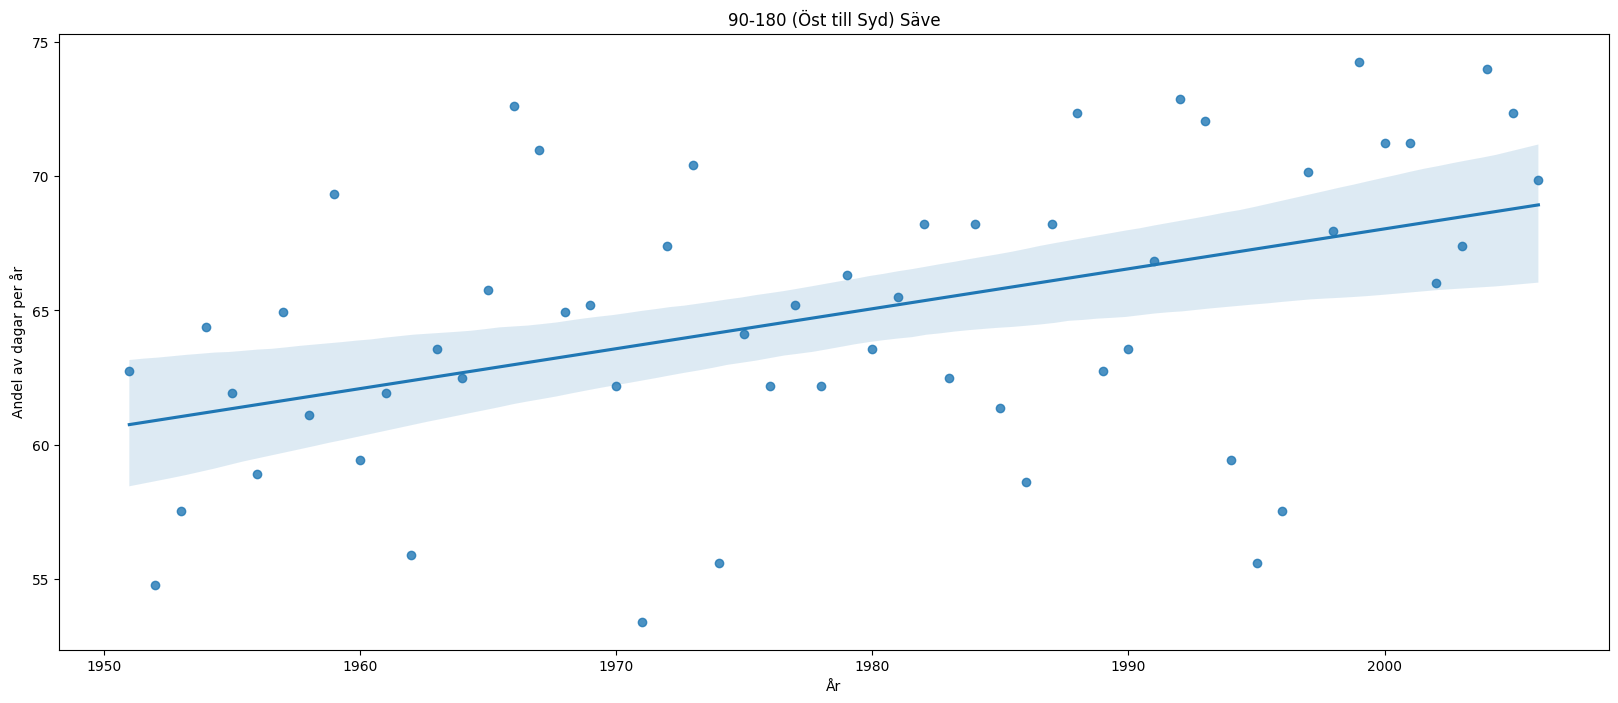

In [ ]:
plt.figure(figsize=(20, 8))
# sns.barplot(df, x='Years', y='Values')
sns.regplot(x=df['Years'], y=df['Values'])
plt.title('90-180 (Öst till Syd) Säve')
plt.ylabel('Andel av dagar per år')
plt.xlabel('År')



Gör samma ige, fast för öst till norr

In [ ]:
df_save_reduced_west_north = df_save[(df_save['Vindriktning'] > 270) & (df_save['Vindriktning'] <= 360)].copy()

In [ ]:
dates_present_west_north = {}
for i in range (1951, 2007):
    dates = []
    counter = 0
    for ind, val in df_save_reduced_west_north.iterrows():
        if val['Year'] == i:
            if val['Datum'] not in dates:
                dates.append(val['Datum'])
                counter += 1
    res = {f'{i}': counter}            
    dates_present_west_north.update(res)


for key in dates_present_west_north:
    dates_present_west_north[key] = f'{(dates_present_west_north[key] / 365)*100:.2f}'


years_west_north = list(dates_present_west_north.keys())
values_west_north = list(dates_present_west_north.values())
df_west_north = pd.DataFrame({'Years': years_west_north, 'Values': values_west_north})
df_west_north['Values'] = df_west_north['Values'].astype(float)
df_west_north['Years'] = df_west_north['Years'].astype(int)

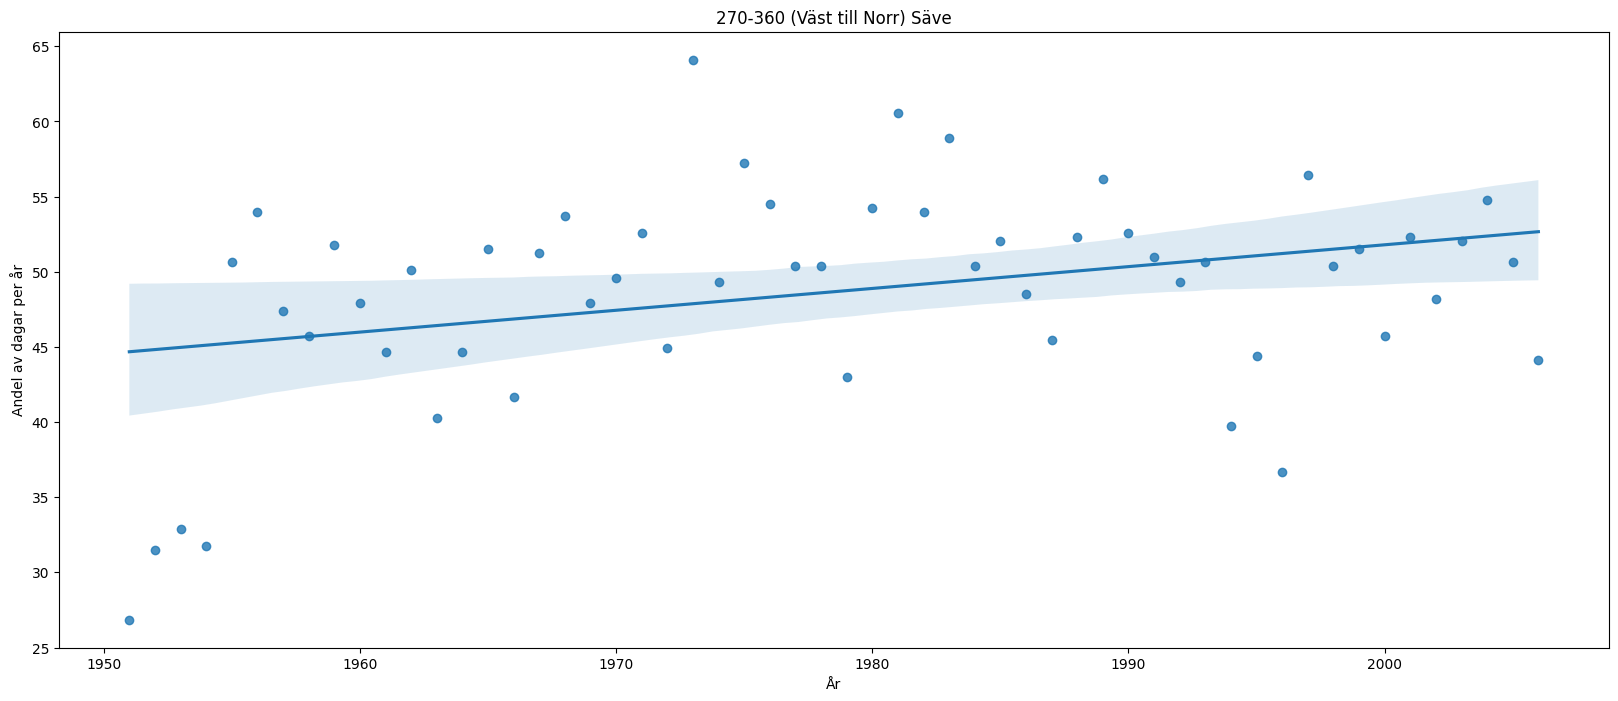

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot(x=df_west_north['Years'], y=df_west_north['Values'])
plt.title('270-360 (Väst till Norr) Säve')
plt.ylabel('Andel av dagar per år')
plt.xlabel('År')
plt.show()

North-east


In [ ]:
df_save_reduced_north_east= df_save[(df_save['Vindriktning'] > 0) & (df_save['Vindriktning'] <= 90)].copy()
dates_present_north_east = {}
for i in range (1951, 2007):
    dates = []
    counter = 0
    for ind, val in df_save_reduced_north_east.iterrows():
        if val['Year'] == i:
            if val['Datum'] not in dates:
                dates.append(val['Datum'])
                counter += 1
    res = {f'{i}': counter}            
    dates_present_north_east.update(res)


for key in dates_present_north_east:
    dates_present_north_east[key] = f'{(dates_present_north_east[key] / 365)*100:.2f}'


years_north_east = list(dates_present_north_east.keys())
values_north_east = list(dates_present_north_east.values())
df_north_east = pd.DataFrame({'Years': years_north_east, 'Values': values_north_east})
df_north_east['Values'] = df_north_east['Values'].astype(float)
df_north_east['Years'] = df_north_east['Years'].astype(int)


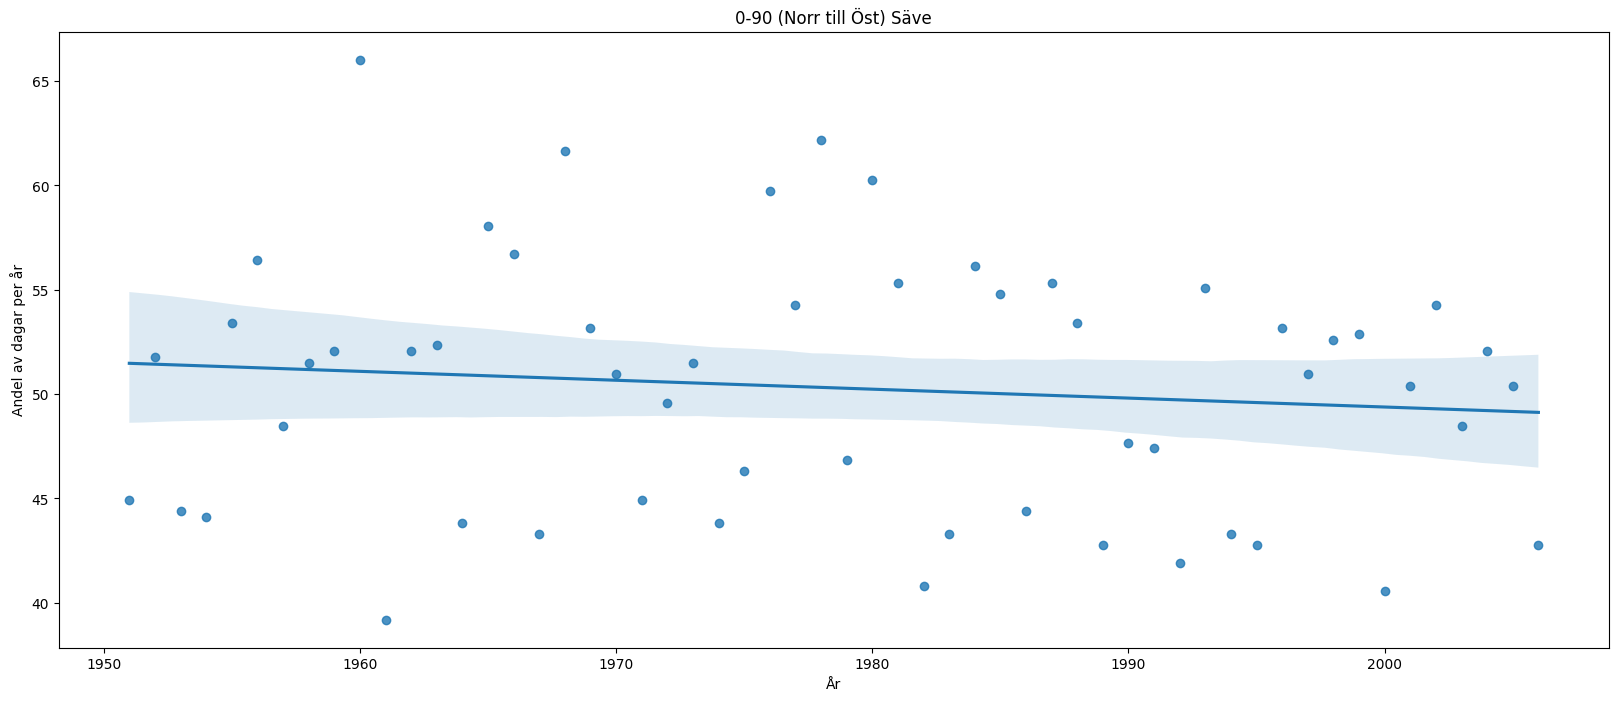

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot(x=df_north_east['Years'], y=df_north_east['Values'])
plt.title('0-90 (Norr till Öst) Säve')
plt.ylabel('Andel av dagar per år')
plt.xlabel('År')
plt.show()

South-west

In [ ]:
df_save_reduced_south_west= df_save[(df_save['Vindriktning'] > 180) & (df_save['Vindriktning'] <= 270)].copy()
dates_present_south_west = {}
for i in range (1951, 2007):
    dates = []
    counter = 0
    for ind, val in df_save_reduced_south_west.iterrows():
        if val['Year'] == i:
            if val['Datum'] not in dates:
                dates.append(val['Datum'])
                counter += 1
    res = {f'{i}': counter}            
    dates_present_south_west.update(res)


for key in dates_present_south_west:
    dates_present_south_west[key] = f'{(dates_present_south_west[key] / 365)*100:.2f}'


years_south_west = list(dates_present_south_west.keys())
values_south_west = list(dates_present_south_west.values())
df_south_west = pd.DataFrame({'Years': years_south_west, 'Values': values_south_west})
df_south_west['Values'] = df_south_west['Values'].astype(float)
df_south_west['Years'] = df_south_west['Years'].astype(int)


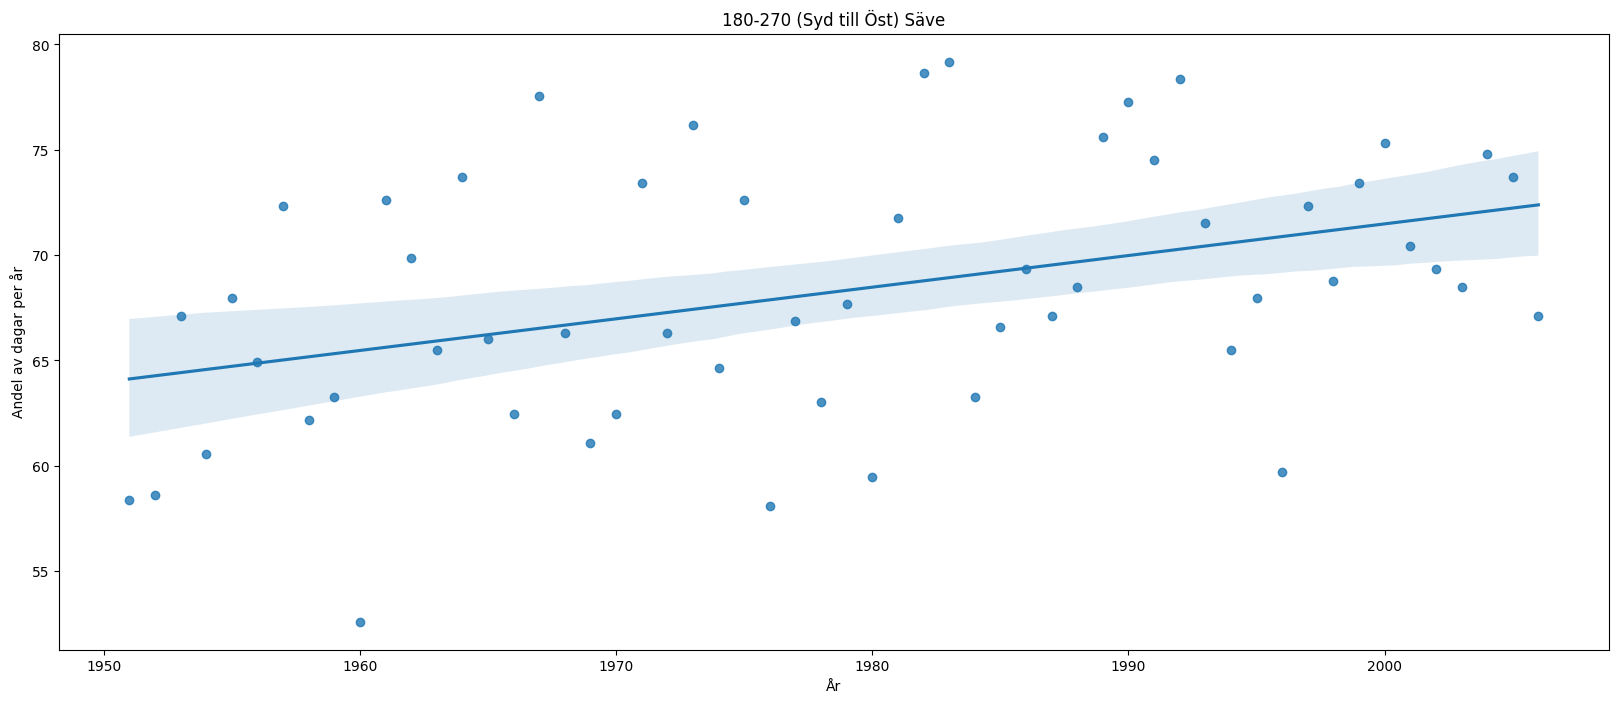

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot(x=df_south_west['Years'], y=df_south_west['Values'])
plt.title('180-270 (Syd till Öst) Säve')
plt.ylabel('Andel av dagar per år')
plt.xlabel('År')
plt.show()

Kombinera plottarna till en plot

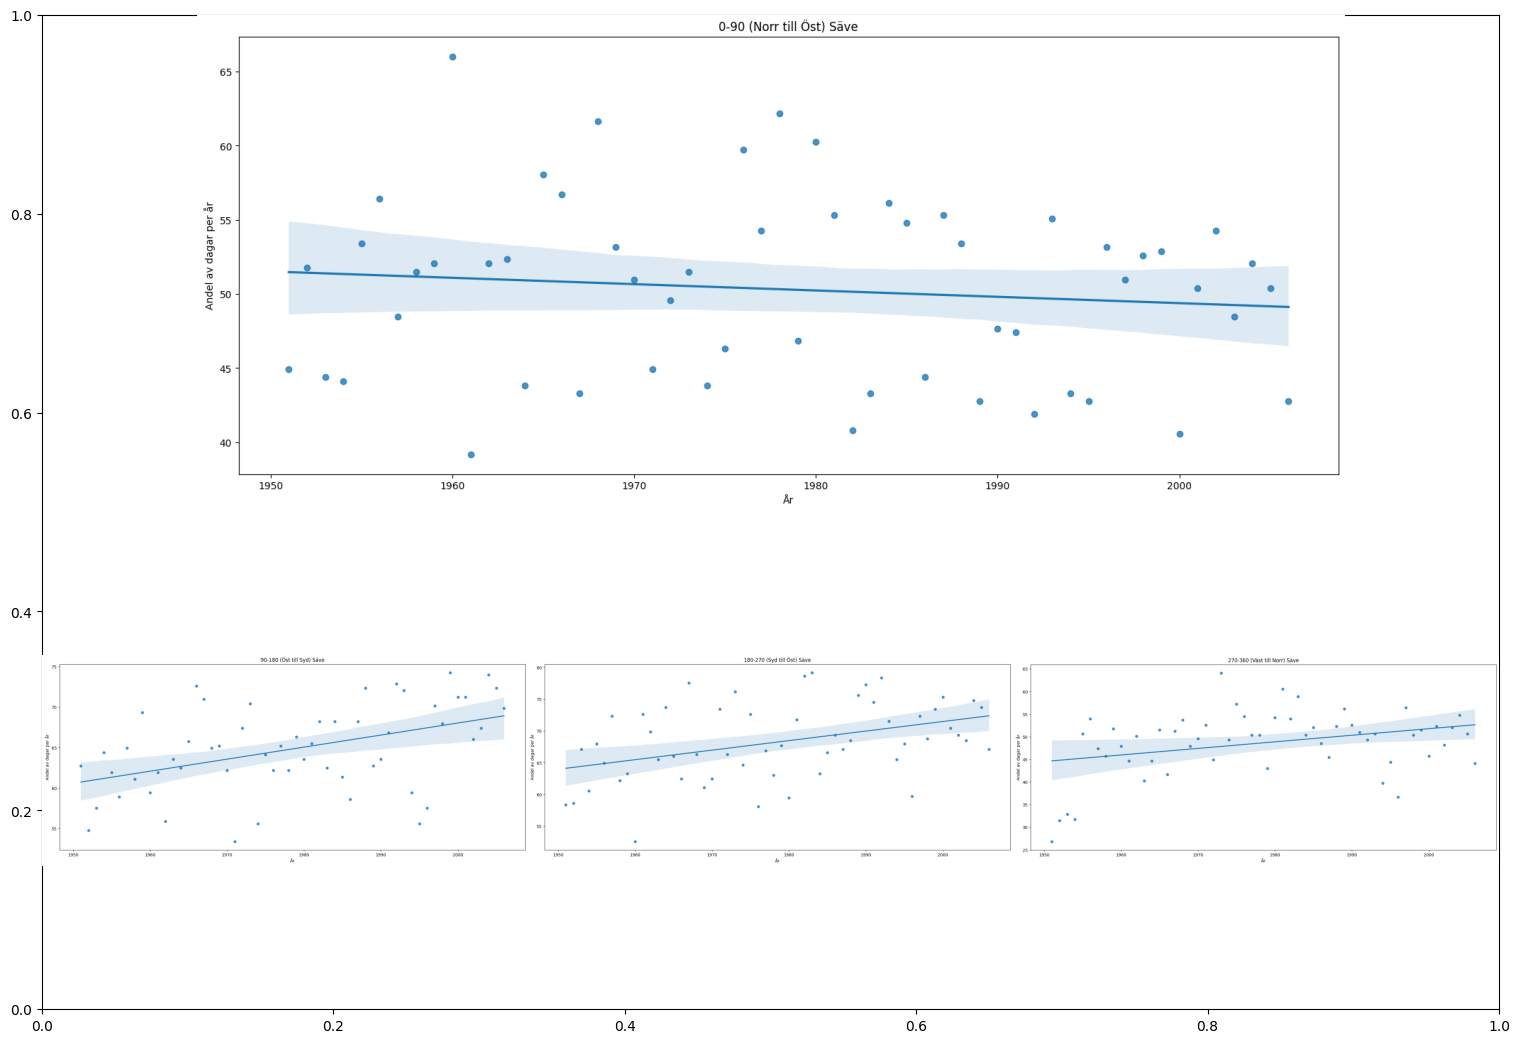

In [94]:


fig, ax = plt.subplots(figsize=(15, 10), frameon=False, tight_layout=True)
gs = fig.add_gridspec(2, 3, hspace=0, wspace=0)
top_ax = fig.add_subplot(gs[0, :])
bot_left = fig.add_subplot(gs[1, 0])
bot_center = fig.add_subplot(gs[1, 1])
bot_right = fig.add_subplot(gs[1, 2])
img1 = plim.imread('change_of_wind_0_90_save.png')
img2 = plim.imread('change_of_wind_90_180_save.png')
img3 = plim.imread('change_of_wind_180_270_save.png')
img4 = plim.imread('change_of_wind_270_360_save.png')
top_ax.imshow(img1)
top_ax.set_axis_off()
bot_left.imshow(img2)
bot_left.set_axis_off()
bot_center.imshow(img3)
bot_center.set_axis_off()
bot_right.imshow(img4)
bot_right.set_axis_off()
plt.tight_layout(pad=0,h_pad=0)

C:\Users\olofs\AppData\Local\Temp\ipykernel_292\3033740636.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0,h_pad=0)


<Figure size 640x480 with 0 Axes>

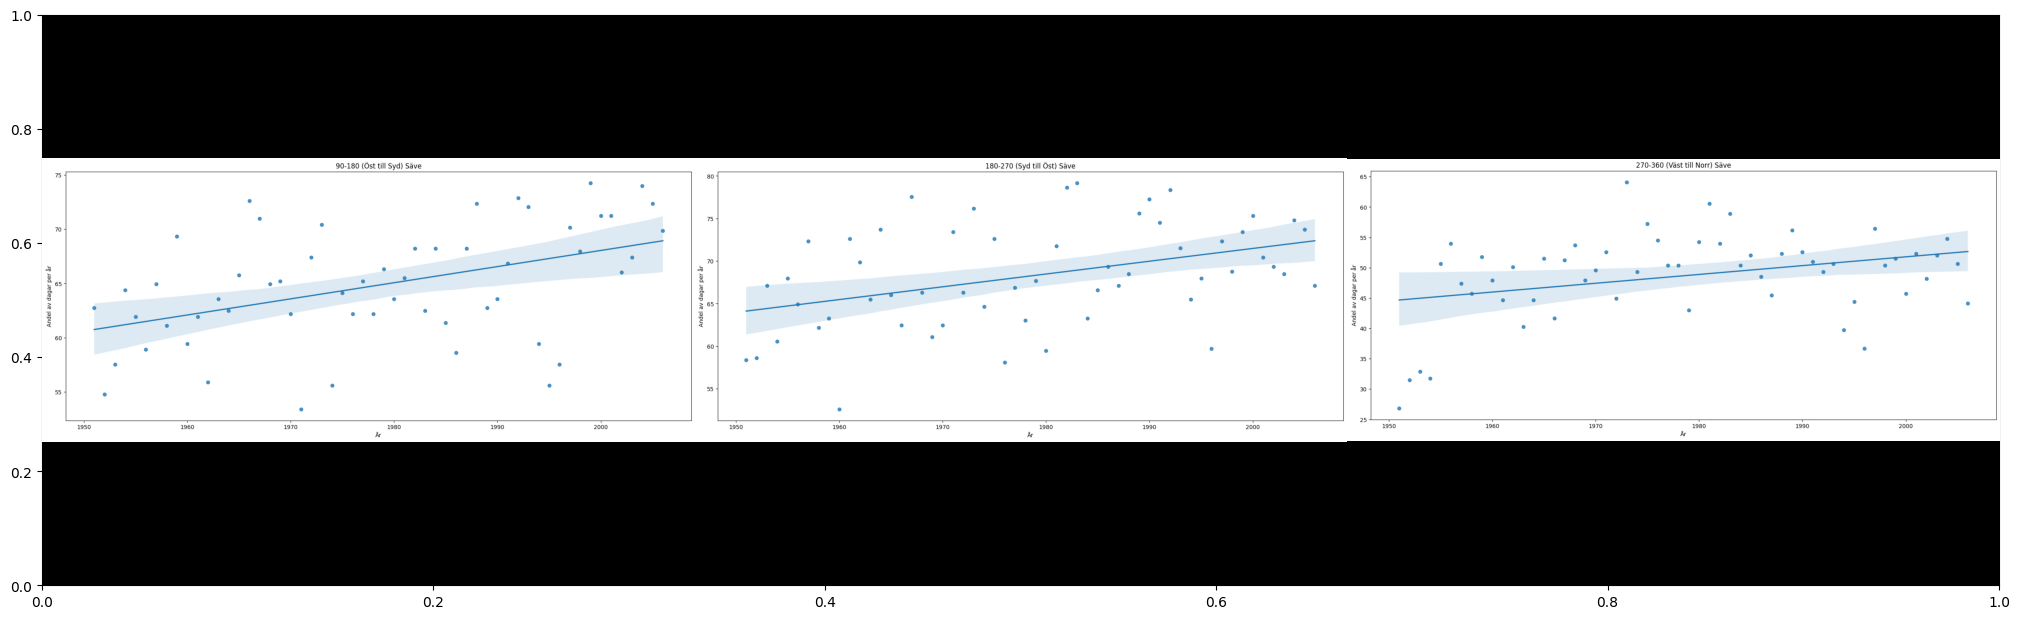

In [120]:
plt.figure(facecolor='b')
fig, ax = plt.subplots(figsize=(20, 6), frameon=False)
ax.set_facecolor('black')
fig.set_facecolor('black')
gs = fig.add_gridspec(1, 3, hspace=1, wspace=0)
bot_left = fig.add_subplot(gs[0, 0])
bot_center = fig.add_subplot(gs[0, 1])
bot_right = fig.add_subplot(gs[0, 2])
img2 = plim.imread('change_of_wind_90_180_save.png')
img3 = plim.imread('change_of_wind_180_270_save.png')
img4 = plim.imread('change_of_wind_270_360_save.png')
bot_left.imshow(img2)
bot_left.set_axis_off()
bot_center.imshow(img3)
bot_center.set_axis_off()
bot_right.imshow(img4)
bot_right.set_axis_off()
plt.tight_layout(pad=0,h_pad=0)
plt.show()

Kolla 0_90 för Göteborg

In [ ]:
df_gbg = pd.read_pickle('../Dataframes/df_wind_gbg.pkl')

In [ ]:
df_gbg

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Kvalitet_1,Year,Month,Snitt_per_dag,Max_uppmätta_hastighet
0,1961-01-01,06:00:00,180.0,G,0.0,G,1961,1,2.33,4.0
1,1961-01-01,12:00:00,180.0,G,4.0,G,1961,1,2.33,4.0
2,1961-01-01,18:00:00,140.0,G,3.0,G,1961,1,2.33,4.0
3,1961-01-02,06:00:00,180.0,G,4.0,G,1961,1,5.00,6.0
4,1961-01-02,12:00:00,180.0,G,5.0,G,1961,1,5.00,6.0
...,...,...,...,...,...,...,...,...,...,...
305146,2023-07-01,02:00:00,249.0,G,3.1,G,2023,7,2.47,3.5
305147,2023-07-01,03:00:00,226.0,G,2.2,G,2023,7,2.47,3.5
305148,2023-07-01,04:00:00,223.0,G,2.3,G,2023,7,2.47,3.5
305149,2023-07-01,05:00:00,217.0,G,1.9,G,2023,7,2.47,3.5


In [ ]:
df_gbg_reduced_north_east= df_gbg[(df_gbg['Vindriktning'] > 0) & (df_gbg['Vindriktning'] <= 90)].copy()
dates_present_north_east = {}
for i in range (1961, 2024):
    dates = []
    counter = 0
    for ind, val in df_gbg_reduced_north_east.iterrows():
        if val['Year'] == i:
            if val['Datum'] not in dates:
                dates.append(val['Datum'])
                counter += 1
    res = {f'{i}': counter}            
    dates_present_north_east.update(res)


for key in dates_present_north_east:
    dates_present_north_east[key] = f'{(dates_present_north_east[key] / 365)*100:.2f}'


years_north_east = list(dates_present_north_east.keys())
values_north_east = list(dates_present_north_east.values())
df_north_east = pd.DataFrame({'Years': years_north_east, 'Values': values_north_east})
df_north_east['Values'] = df_north_east['Values'].astype(float)
df_north_east['Years'] = df_north_east['Years'].astype(int)


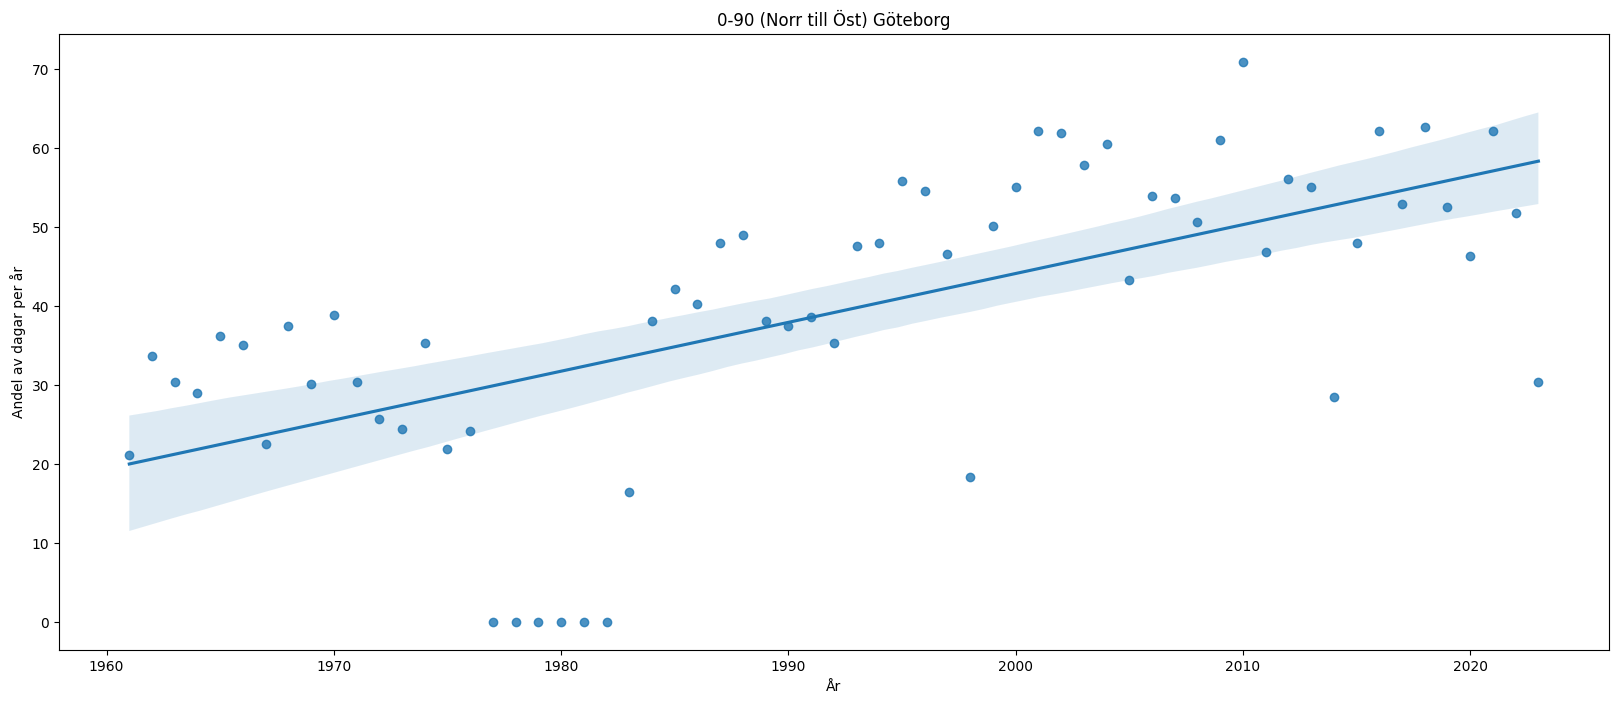

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot(x=df_north_east['Years'], y=df_north_east['Values'])
plt.title('0-90 (Norr till Öst) Göteborg')
plt.ylabel('Andel av dagar per år')
plt.xlabel('År')
plt.show()

Kolla 0-90 för Vinga

In [ ]:
df_vinga = pd.read_pickle('../Dataframes/df_wind_vinga.pkl')

In [ ]:
df_vinga

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Kvalitet_1,Year,Month,Snitt_per_dag,Max_uppmätta_hastighet
0,1926-01-01,01:00:00,290.0,G,8.0,G,1926,1,4.40,8.0
1,1926-01-01,07:00:00,20.0,G,8.0,G,1926,1,4.40,8.0
2,1926-01-01,13:00:00,360.0,G,4.0,G,1926,1,4.40,8.0
3,1926-01-01,18:00:00,320.0,G,2.0,G,1926,1,4.40,8.0
4,1926-01-01,20:00:00,0.0,G,0.0,G,1926,1,4.40,8.0
...,...,...,...,...,...,...,...,...,...,...
275798,2023-07-01,02:00:00,248.0,G,6.1,G,2023,7,6.96,8.1
275799,2023-07-01,03:00:00,230.0,G,7.7,G,2023,7,6.96,8.1
275800,2023-07-01,04:00:00,224.0,G,7.0,G,2023,7,6.96,8.1
275801,2023-07-01,05:00:00,209.0,G,7.0,G,2023,7,6.96,8.1


In [ ]:
df_vinga_reduced_north_east= df_vinga[(df_vinga['Vindriktning'] > 0) & (df_vinga['Vindriktning'] <= 90)].copy()
dates_present_north_east = {}
for i in range (1926, 2024):
    dates = []
    counter = 0
    for ind, val in df_vinga_reduced_north_east.iterrows():
        if val['Year'] == i:
            if val['Datum'] not in dates:
                dates.append(val['Datum'])
                counter += 1
    res = {f'{i}': counter}            
    dates_present_north_east.update(res)


for key in dates_present_north_east:
    dates_present_north_east[key] = f'{(dates_present_north_east[key] / 365)*100:.2f}'


years_north_east = list(dates_present_north_east.keys())
values_north_east = list(dates_present_north_east.values())
df_north_east = pd.DataFrame({'Years': years_north_east, 'Values': values_north_east})
df_north_east['Values'] = df_north_east['Values'].astype(float)
df_north_east['Years'] = df_north_east['Years'].astype(int)


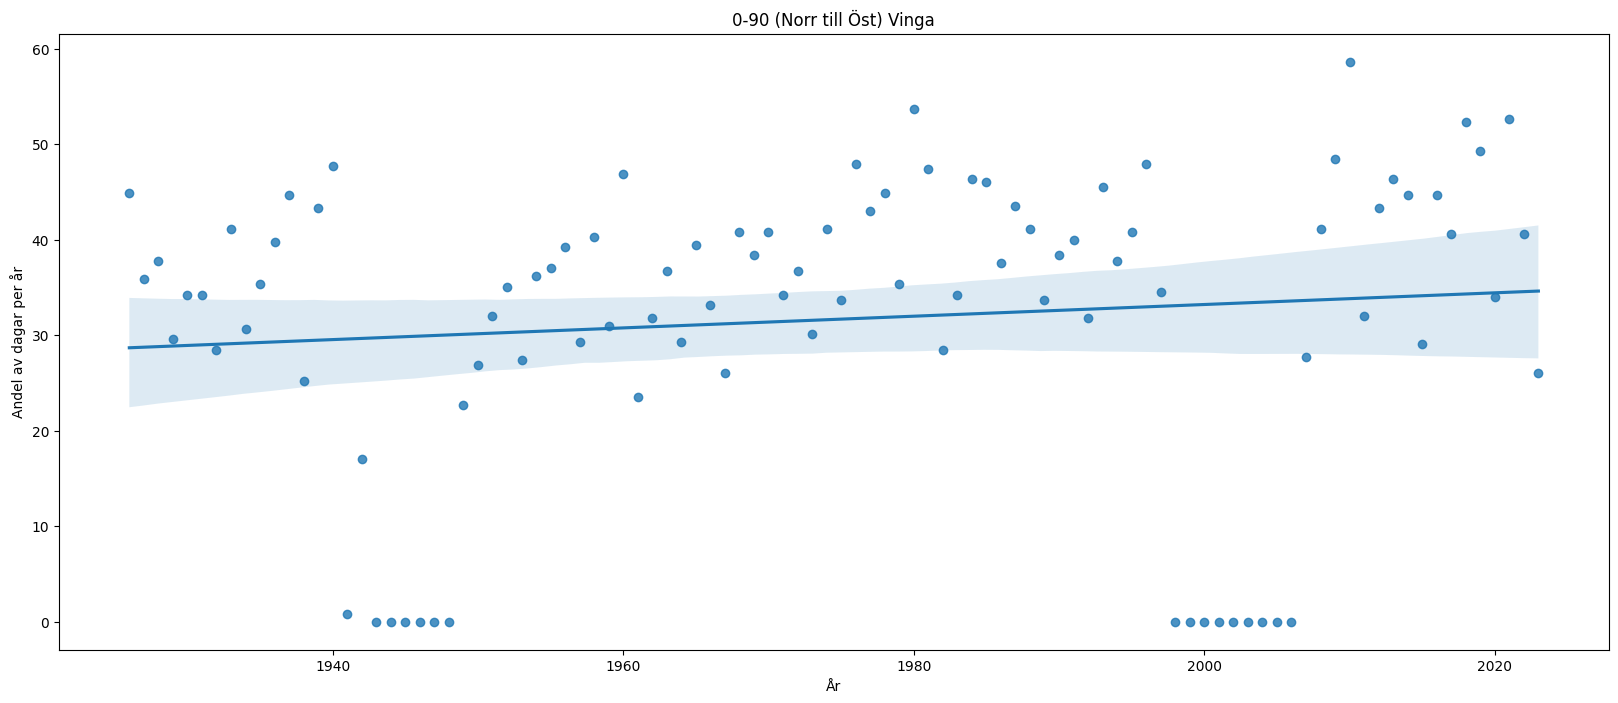

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot(x=df_north_east['Years'], y=df_north_east['Values'])
plt.title('0-90 (Norr till Öst) Vinga')
plt.ylabel('Andel av dagar per år')
plt.xlabel('År')
plt.show()

Se om dessa plottar stämmer med vad vindrosorna visa i wind_direction_gbg